In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import pandas as pd

In [18]:
centers = [[4, 0.3], [4, 0.6]]
X, y = make_blobs(centers=centers)

In [19]:
df = pd.DataFrame(X, columns=['Days on Vacation', 'Sunny Days during Vacation'])
df['Survived?'] = y

df[df['Days on Vacation']<0] = 0
df[df['Sunny Days during Vacation']<0] = 0

In [20]:
df.head()

,Days on Vacation,Sunny Days during Vacation,Survived?
0,5.233558,0.277623,0
1,3.545285,1.405730,1
2,4.859032,0.951939,1
3,0.000000,0.000000,0
4,0.000000,0.000000,0


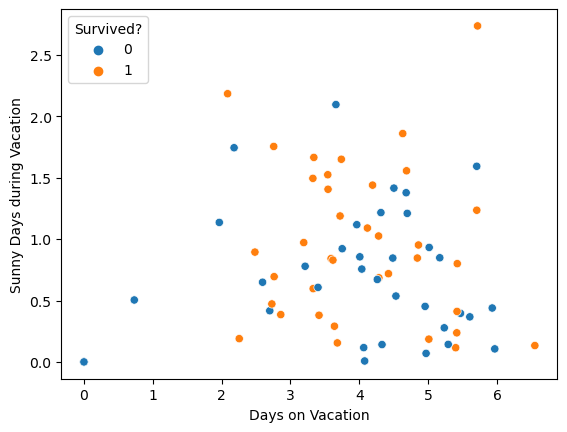

In [21]:
sns.scatterplot(data=df, x='Days on Vacation', y='Sunny Days during Vacation', hue='Survived?')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(df.drop(['Survived?'], axis='columns'), df['Survived?'])

DecisionTreeClassifier(max_depth=2)

We predict the class: [0]


/opt/homebrew/Caskroom/miniforge/base/envs/mci2022/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


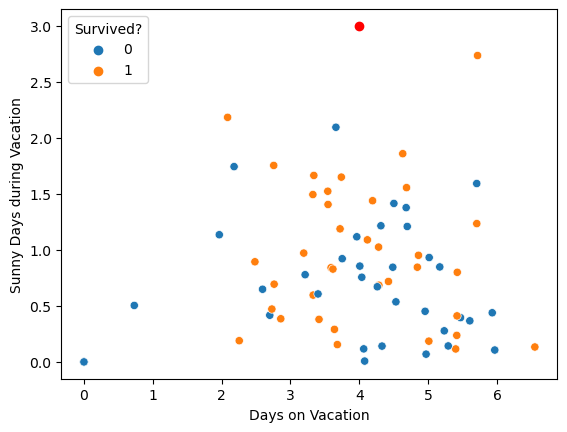

In [28]:
point_to_predict = [[4, 3.0]]

ax = sns.scatterplot(data=df, x='Days on Vacation', y='Sunny Days during Vacation', hue='Survived?')
plt.scatter(point_to_predict[0][0], point_to_predict[0][1], color='r')

print('We predict the class:', clf.predict(point_to_predict))

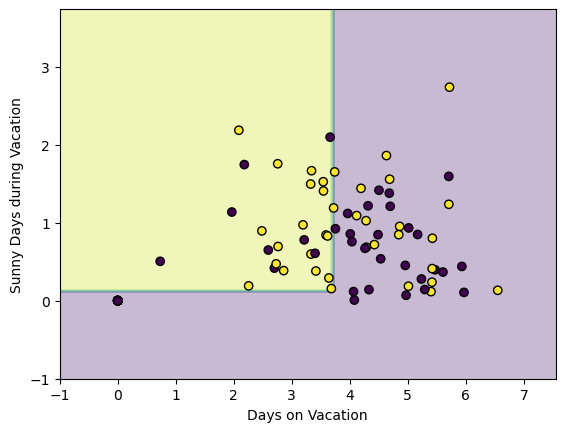

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
     clf, df.drop(['Survived?'], axis='columns'), response_method="predict",
     xlabel='Days on Vacation', ylabel='Sunny Days during Vacation',
     alpha=0.3,
)
disp.ax_.scatter(df['Days on Vacation'], df['Sunny Days during Vacation'], c=df['Survived?'], edgecolor="k")

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.111\ngini = 0.466\nsamples = 100\nvalue = [63, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.6, 0.5, 'X[0] <= 3.745\ngini = 0.495\nsamples = 67\nvalue = [30, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.492\nsamples = 39\nvalue = [22, 17]')]

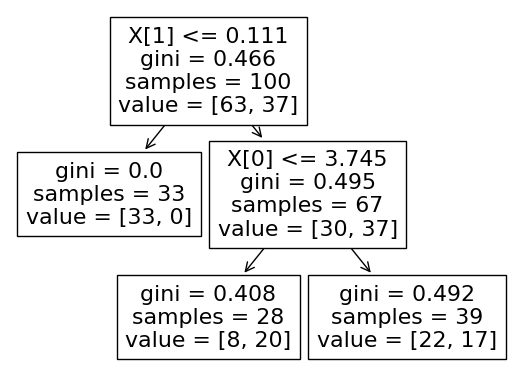

In [30]:
from sklearn.tree import plot_tree

plot_tree(clf)